In [1]:
import base64
import requests

In [2]:
import pose_viz_utils as pv
import pose_match_utils as pm

### Process Images On AWS Lambda

In [3]:
url = "https://zad9kr4tt1.execute-api.us-east-1.amazonaws.com/default/pose-estimator"

In [4]:
with open('./poses/big-red.png', 'rb') as f:
    rawb = f.read()
    img1 = base64.b64encode(rawb)

In [5]:
with open('./poses/inch-worm-person-2-orig.jpg', 'rb') as f:
    rawb = f.read()
    img2 = base64.b64encode(rawb)

In [6]:
with open('./poses/y-person.jpg', 'rb') as f:
    rawb = f.read()
    img3 = base64.b64encode(rawb)

In [7]:
with open('./poses/standing-person.jpg', 'rb') as f:
    rawb = f.read()
    img4 = base64.b64encode(rawb)

In [8]:
%%time
p1 = requests.post(url, data=img1)

CPU times: user 38.9 ms, sys: 14.6 ms, total: 53.6 ms
Wall time: 1.85 s


In [9]:
%%time
p2 = requests.post(url, data=img2)

CPU times: user 27.3 ms, sys: 5.02 ms, total: 32.3 ms
Wall time: 1.49 s


In [10]:
%%time
p3 = requests.post(url, data=img3)

CPU times: user 27.5 ms, sys: 5.65 ms, total: 33.2 ms
Wall time: 2.14 s


In [11]:
%%time
p4 = requests.post(url, data=img4)

CPU times: user 30.9 ms, sys: 6.94 ms, total: 37.9 ms
Wall time: 1.55 s


In [12]:
# with open('./poses/couch-stretch-annotated.jpeg', 'wb') as f:
#     encoded = z.json()['body']['image'][1:]
#     decoded = base64.b64decode(encoded)
#     f.write(decoded)

### Process Poses

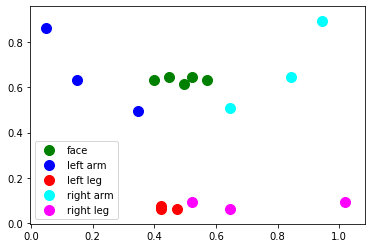

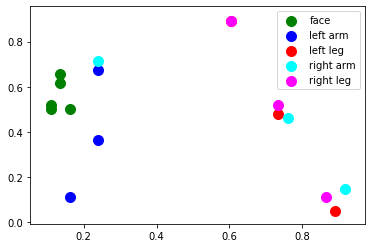

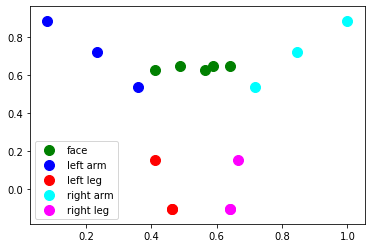

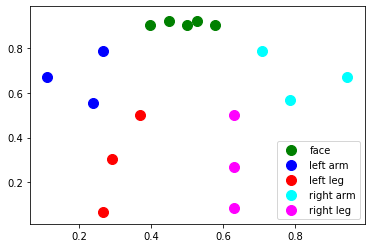

In [13]:
for image in [(p1, False), (p2, True), (p3, False), (p4, False)]:
    data = pm.preprocess_coords(*image)
    pv.plot_keypoint_data(data)

### Flip Images, Calculate Similarity

#### Determine how much flipping the image contributes to similarity score

In [14]:
p1_coords = pm.preprocess_coords(p1)
p2a_coords = pm.preprocess_coords(p2, flip=True)
p2b_coords = pm.preprocess_coords(p2, flip=False)
p3_coords = pm.preprocess_coords(p3)
p4_coords = pm.preprocess_coords(p4)

In [15]:
print(pm.get_match_similarity(p1_coords, p2a_coords))
print(pm.get_match_similarity(p1_coords, p2b_coords))
print(pm.get_match_similarity(p1_coords, p3_coords))
print(pm.get_match_similarity(p1_coords, p4_coords))
print(pm.get_match_similarity(p2a_coords, p3_coords))
print(pm.get_match_similarity(p2a_coords, p4_coords))
print(pm.get_match_similarity(p2b_coords, p3_coords))
print(pm.get_match_similarity(p2b_coords, p4_coords))
print(pm.get_match_similarity(p3_coords, p4_coords))

(0.34330078966700667, 16, 16)
(0.3479957334772809, 9, 11)
(0.3577701121278933, 14, 12)
(0.38896616034101483, 14, 16)
(0.2527031800192405, 9, 11)
(0.2936324237558825, 10, 16)
(0.3274288795555817, 10, 11)
(0.20988174294083614, 9, 16)
(0.25431913133453765, 13, 16)


#### Determine how removing "low confidence" points contributes to similarity score

In [16]:
p1_adj = pm.confidence_adjusted_coordinates(p1)
p3_adj = pm.confidence_adjusted_coordinates(p3, pm.preprocess_confidence(p1))

In [17]:
p3_adj

array([[0.56380681, 0.62867227],
       [0.48728054, 0.6470545 ],
       [0.58931549, 0.6470545 ],
       [0.41075414, 0.62867227],
       [0.64033309, 0.6470545 ],
       [0.35973654, 0.53676103],
       [0.71685948, 0.53676103],
       [0.23219255, 0.72058352],
       [0.84440335, 0.72058352],
       [0.07913994, 0.88602378],
       [0.99745603, 0.88602378],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [18]:
print(pm.get_match_similarity(p1_adj, p2a_coords))
print(pm.get_match_similarity(p1_adj, p2b_coords))
print(pm.get_match_similarity(p1_adj, p3_adj))
print(pm.get_match_similarity(p1_adj, p4_coords))
print(pm.get_match_similarity(p2a_coords, p3_adj))
print(pm.get_match_similarity(p2a_coords, p4_coords))
print(pm.get_match_similarity(p2b_coords, p3_adj))
print(pm.get_match_similarity(p2b_coords, p4_coords))
print(pm.get_match_similarity(p3_adj, p4_coords))

(0.34027284575361416, 10, 11)
(0.3479957334772809, 9, 11)
(0.12262638085016725, 7, 7)
(0.27398743636124445, 13, 15)
(0.5161112016287563, 15, 6)
(0.2936324237558825, 10, 16)
(0.4443707856148178, 9, 6)
(0.20988174294083614, 9, 16)
(0.27398743636124445, 13, 15)
